In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import bs4 as bs
import requests

import keras as ks
import cv2 as cv
import sklearn as sk

import re
import os
import datetime
import random
import time
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5, palette='Blues', font='Arial', rc={'figure.figsize':(8,6)})

In [2]:
df = pd.read_csv('./Highest Holywood Grossing Movies.csv')
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [4]:
colsToRemove = ['Unnamed: 0','License','Release Date']

df.drop(colsToRemove, axis=1, inplace=True)

In [5]:
df.head()

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Domestic Sales (in $)       918 non-null    int64 
 4   International Sales (in $)  918 non-null    int64 
 5   World Sales (in $)          918 non-null    int64 
 6   Genre                       918 non-null    object
 7   Movie Runtime               918 non-null    object
dtypes: int64(3), object(5)
memory usage: 57.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Domestic Sales (in $),918.00,167746917.94,104036044.97,80360843.00,101607071.75,132135096.00,191390485.50,936662225.00
International Sales (in $),918.00,230143435.58,217601104.22,260.00,88456200.25,163881928.00,288557651.00,2086738578.00
World Sales (in $),918.00,396866825.78,308262916.04,81600000.00,200556355.25,301941607.00,475071823.50,2847246203.00


<AxesSubplot:>

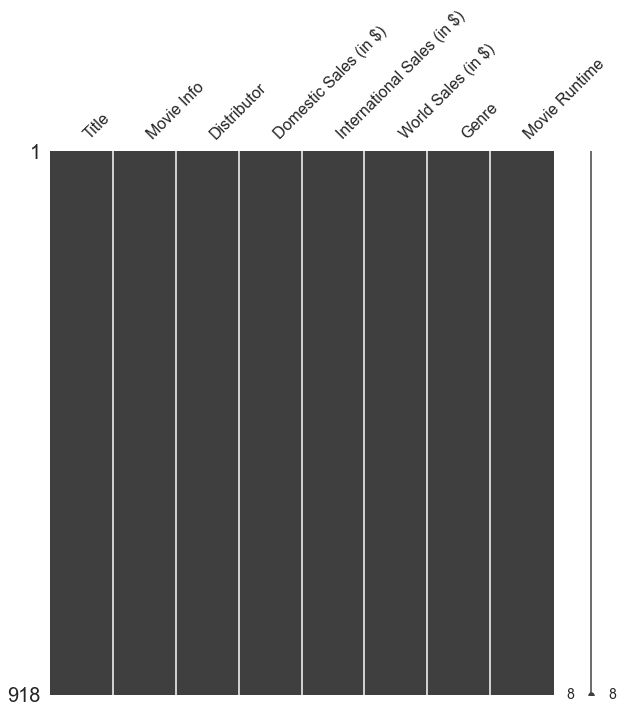

In [8]:
msno.matrix(df, figsize=(10,10))

In [9]:
df.head()

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min


make a new "Year" column

In [10]:
df['Year'] = df['Title'].str.extract('(\d{4})', expand=False) # extract year from title
df.head()

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,Year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,2009
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,2018
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,2018


In [11]:
df_year = df.groupby('Year').count().sort_values('Title', ascending=False)
df_year

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime
Year,,,,,,,,
2014,46,46,46,46,46,46,46,46
2013,44,44,44,44,44,44,44,44
2010,42,42,42,42,42,42,42,42
2018,38,38,38,38,38,38,38,38
2016,38,38,38,38,38,38,38,38
2012,38,38,38,38,38,38,38,38
2011,38,38,38,38,38,38,38,38
2017,37,37,37,37,37,37,37,37
2008,37,37,37,37,37,37,37,37


In [12]:
df_Distributor = df.groupby('Distributor').count().sort_values('Title', ascending=False)[:10]
df_Distributor

,Title,Movie Info,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,Year
Distributor,,,,,,,,
Warner Bros.,158,158,158,158,158,158,158,158
Walt Disney Studios Motion Pictures,155,155,155,155,155,155,155,155
Universal Pictures,119,119,119,119,119,119,119,119
Twentieth Century Fox,117,117,117,117,117,117,117,117
Sony Pictures Entertainment (SPE),101,101,101,101,101,101,101,101
Paramount Pictures,99,99,99,99,99,99,99,99
New Line Cinema,21,21,21,21,21,21,21,21
DreamWorks,21,21,21,21,21,21,21,21
Lionsgate,19,19,19,19,19,19,19,19


# Top 10 distributors according to the number of movies they've produced

In [13]:
print("Top 10 movies distributors:", list(df_Distributor.index))

Top 10 movies distributors: ['Warner Bros.', 'Walt Disney Studios Motion Pictures', 'Universal Pictures', 'Twentieth Century Fox', 'Sony Pictures Entertainment (SPE)', 'Paramount Pictures', 'New Line Cinema', 'DreamWorks', 'Lionsgate', 'DreamWorks Distribution']


<AxesSubplot:xlabel='Title', ylabel='Distributor'>

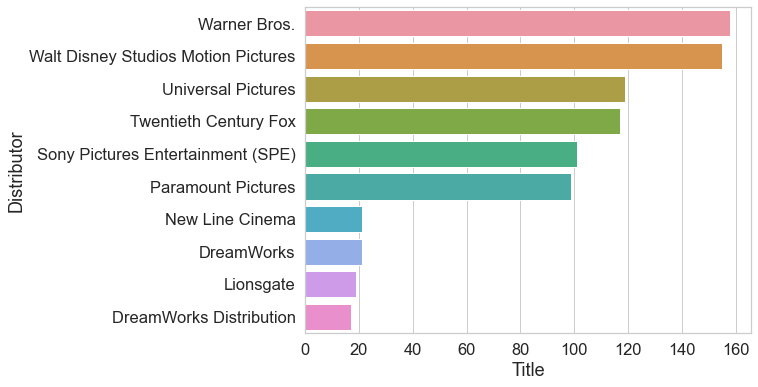

In [14]:
sns.barplot(y=df_Distributor.index, x=df_Distributor['Title'])


# Top 10 distributors according to the sales

In [15]:
df_sales = df.groupby('Distributor').sum().sort_values('World Sales (in $)', ascending=False)[:10]
df_sales

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
Distributor,,,
Walt Disney Studios Motion Pictures,34098331657,48781958509,82372098598
Warner Bros.,25891722993,37741574581,63597493931
Twentieth Century Fox,19114852793,29338267462,48588894179
Universal Pictures,19316009134,26232717142,45602644818
Sony Pictures Entertainment (SPE),15764875138,21691612943,37456488081
Paramount Pictures,14484465716,18238306006,32443523480
DreamWorks,4040554079,6372421823,10412975902
Lionsgate,3424851174,4164163096,7498505934
New Line Cinema,3454990873,3611355122,7066345995


<AxesSubplot:xlabel='World Sales (in $)', ylabel='Distributor'>

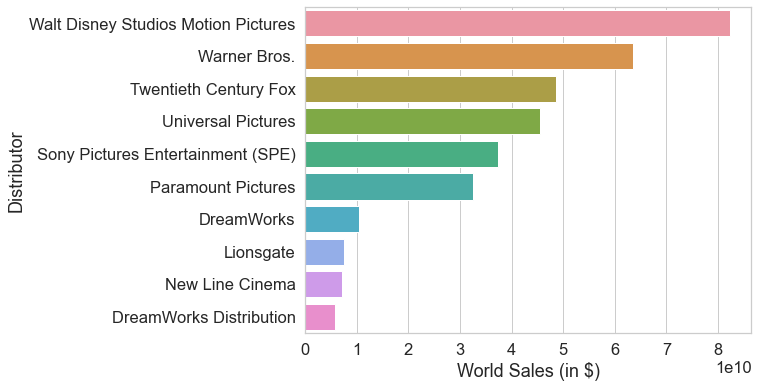

In [16]:
sns.barplot(y=df_sales.index, x=df_sales['World Sales (in $)'])

In [17]:
df.head()

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,Year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,2009
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,2018
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,2018


In [18]:
df['Genre_Action'] = 0
df['Genre_Adventure'] = 0
df['Genre_Sci-Fi'] = 0
df['Genre_Drama'] = 0
df['Genre_Fantasy'] = 0
df['Genre_Crime'] = 0
df['Genre_Comedy'] = 0
df['Genre_Romance'] = 0
df['Genre_Animation'] = 0
df['Genre_Thriller'] = 0
df['Genre_Musical'] = 0
df['Genre_Biography'] = 0
df['Genre_Horror'] = 0
df['Genre_Mystery'] = 0
df['Genre_Family'] = 0
genres = ['Genre_Action', 'Genre_Adventure', 'Genre_Sci-Fi', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Crime', 'Genre_Comedy', 'Genre_Romance', 'Genre_Animation', 'Genre_Thriller', 'Genre_Musical', 'Genre_Biography', 'Genre_Horror', 'Genre_Mystery', 'Genre_Family']

In [19]:
for i in range(len(df['Genre'])):
    if df['Genre'][i].__contains__("Action"):
        df['Genre_Action'][i]=1
    
        
    if df['Genre'][i].__contains__("Adventure"):
        df['Genre_Adventure'][i]=1
        
    if df['Genre'][i].__contains__("Sci-Fi"):
        df['Genre_Sci-Fi'][i]=1
    
    if df['Genre'][i].__contains__("Drama"):
        df['Genre_Drama'][i]=1
        
    if df['Genre'][i].__contains__("Fantasy"):
        df['Genre_Fantasy'][i]=1
        
    if df['Genre'][i].__contains__("Crime"):
        df['Genre_Crime'][i]=1
        
    if df['Genre'][i].__contains__("Comedy"):
        df['Genre_Comedy'][i]=1
        
    if df['Genre'][i].__contains__("Romance"):
        df['Genre_Romance'][i]=1
        
    if df['Genre'][i].__contains__("Animation"):
        df['Genre_Animation'][i]=1
        
    if df['Genre'][i].__contains__("Thriller"):
        df['Genre_Thriller'][i]=1
        
    if df['Genre'][i].__contains__("Musical"):
        df['Genre_Musical'][i]=1
        
    if df['Genre'][i].__contains__("Biography"):
        df['Genre_Biography'][i]=1
        
    if df['Genre'][i].__contains__("Horror"):
        df['Genre_Horror'][i]=1
        
    if df['Genre'][i].__contains__("Mystery"):
        df['Genre_Mystery'][i]=1
        
    if df['Genre'][i].__contains__("Family"):
        df['Genre_Family'][i]=1

Drop old Genre column

In [20]:
df = df.drop(columns = ['Genre'])


In [21]:
df.head()

,Title,Movie Info,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,Year,Genre_Action,Genre_Adventure,Genre_Sci-Fi,Genre_Drama,Genre_Fantasy,Genre_Crime,Genre_Comedy,Genre_Romance,Genre_Animation,Genre_Thriller,Genre_Musical,Genre_Biography,Genre_Horror,Genre_Mystery,Genre_Family
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,2 hr 18 min,2015,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,3 hr 1 min,2019,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,760507625,2086738578,2847246203,2 hr 42 min,2009,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,2 hr 14 min,2018,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,2 hr 29 min,2018,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
action_movies = list(df[df['Genre_Action'] == 1]['Title'])
action_movies

['Star Wars: Episode VII - The Force Awakens (2015)',
 'Avengers: Endgame (2019)',
 'Avatar (2009)',
 'Black Panther (2018)',
 'Avengers: Infinity War (2018)',
 'Spider-Man: No Way Home (2021)',
 'Jurassic World (2015)',
 'The Avengers (2012)',
 'Star Wars: Episode VIII - The Last Jedi (2017)',
 'Incredibles 2 (2018)',
 'The Dark Knight (2008)',
 'Rogue One: A Star Wars Story (2016)',
 'Star Wars: Episode IX - The Rise of Skywalker (2019)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Avengers: Age of Ultron (2015)',
 'The Dark Knight Rises (2012)',
 'Captain Marvel (2019)',
 'The Hunger Games: Catching Fire (2013)',
 "Pirates of the Caribbean: Dead Man's Chest (2006)",
 'Jurassic World: Fallen Kingdom (2018)',
 'Wonder Woman (2017)',
 'Iron Man 3 (2013)',
 'Captain America: Civil War (2016)',
 'The Hunger Games (2012)',
 'Spider-Man (2002)',
 'Jumanji: Welcome to the Jungle (2017)',
 'Jurassic Park (1993)',
 'Transformers: Reveng

Using pie chart to illustrate the percentage of different genre in total sale



In [23]:
# Total count of all movies by genre

count_Action, count_Adventure, count_Sci_Fi, count_Drama, count_Fantasy, count_Crime, count_Comedy, count_Romance, count_Animation, count_Thriller, count_Musical, count_Biography, count_Horror, count_Mystery, count_Family =df['Genre_Action'].sum(), df['Genre_Adventure'].sum(), df['Genre_Sci-Fi'].sum(), df['Genre_Drama'].sum(), df['Genre_Fantasy'].sum(), df['Genre_Crime'].sum(), df['Genre_Comedy'].sum(), df['Genre_Romance'].sum(), df['Genre_Animation'].sum(), df['Genre_Thriller'].sum(), df['Genre_Musical'].sum(), df['Genre_Biography'].sum(), df['Genre_Horror'].sum(), df['Genre_Mystery'].sum(), df['Genre_Family'].sum()

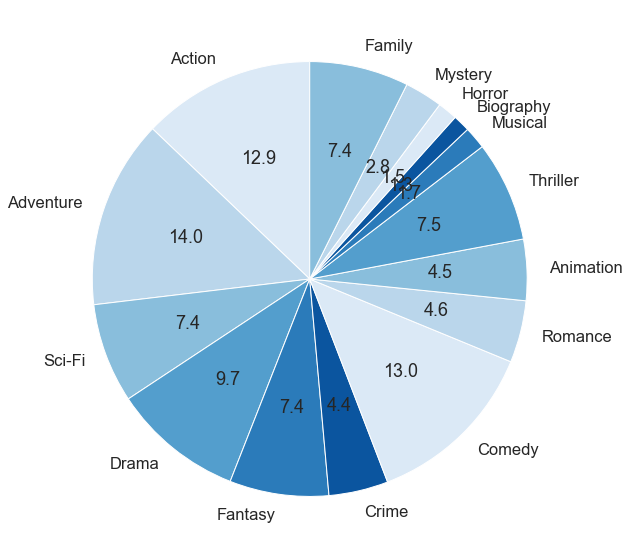

In [24]:
plt.figure(figsize=(10,10))
plt.pie([count_Action, count_Adventure, count_Sci_Fi, count_Drama, count_Fantasy, count_Crime, count_Comedy, count_Romance, count_Animation, count_Thriller, count_Musical, count_Biography, count_Horror, count_Mystery, count_Family], labels=['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Crime', 'Comedy', 'Romance', 'Animation', 'Thriller', 'Musical', 'Biography', 'Horror', 'Mystery', 'Family'], autopct='%1.1f', startangle=90);


In [25]:
sale_Action , sale_Adventure, sale_Sci_Fi, sale_Drama, sale_Fantasy, sale_Crime, sale_Comedy, sale_Romance, sale_Animation, sale_Thriller, sale_Musical, sale_Biography, sale_Horror, sale_Mystery, sale_Family = df['Genre_Action'].sum()*df['World Sales (in $)'].mean(), df['Genre_Adventure'].sum()*df['World Sales (in $)'].mean(), df['Genre_Sci-Fi'].sum()*df['World Sales (in $)'].mean(), df['Genre_Drama'].sum()*df['World Sales (in $)'].mean(), df['Genre_Fantasy'].sum()*df['World Sales (in $)'].mean(), df['Genre_Crime'].sum()*df['World Sales (in $)'].mean(), df['Genre_Comedy'].sum()*df['World Sales (in $)'].mean(), df['Genre_Romance'].sum()*df['World Sales (in $)'].mean(), df['Genre_Animation'].sum()*df['World Sales (in $)'].mean(), df['Genre_Thriller'].sum()*df['World Sales (in $)'].mean(), df['Genre_Musical'].sum()*df['World Sales (in $)'].mean(), df['Genre_Biography'].sum()*df['World Sales (in $)'].mean(), df['Genre_Horror'].sum()*df['World Sales (in $)'].mean(), df['Genre_Mystery'].sum()*df['World Sales (in $)'].mean(), df['Genre_Family'].sum()*df['World Sales (in $)'].mean()

<AxesSubplot:>

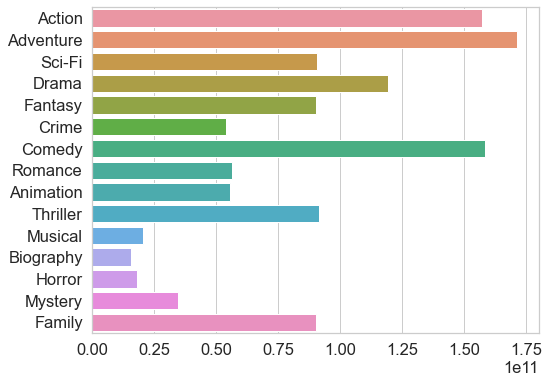

In [26]:
sns.barplot(y=['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Crime', 'Comedy', 'Romance', 'Animation', 'Thriller', 'Musical', 'Biography', 'Horror', 'Mystery', 'Family'], x=[sale_Action, sale_Adventure, sale_Sci_Fi, sale_Drama, sale_Fantasy, sale_Crime, sale_Comedy, sale_Romance, sale_Animation, sale_Thriller, sale_Musical, sale_Biography, sale_Horror, sale_Mystery, sale_Family])